実験Ⅳ－１　非線形回帰サンプル

1. サンプルデータの読み込み
1. 線形単回帰の実行
1. 多項式単回帰の実行



In [179]:
!pip install japanize-matplotlib

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib #日本語化matplotlib
sns.set(font="IPAexGothic") #日本語フォント設定


## Google Colaboratory でファイルを読み込む

以下の方法があります。

1. ファイルをアップロードする
1. URL を指定する

In [ ]:
# ファイルをアップロードする
#from google.colab import files
#uploaded_file = files.upload()
#file_name = next(iter(uploaded_file))
#print(file_name)

# URLを指定する

In [180]:

#観測データのファイル
filename = './data/example01_01.txt

#観測データ（空白区切り）の読み込み
dataset = pd.read_csv(filename, delim_whitespace=True)
display(dataset)

#観測データ数
nSamples = len(dataset)

,XDATA,YDATA
0,0.000600,0.0275
1,0.001200,-0.0063
2,0.001800,0.0075
3,0.002400,0.0362
4,0.002999,0.0650
...,...,...
6663,3.997600,0.3050
6664,3.998200,0.3163
6665,3.998800,0.3638
6666,3.999400,0.3713


In [181]:
# 説明変数の設定
x = dataset.iloc[:,0].values.reshape(-1,1) 
#display(x)

# 目的変数の設定
y = dataset.iloc[:,1].values.reshape(-1,1)
#display(y)

## 観測データの散布図


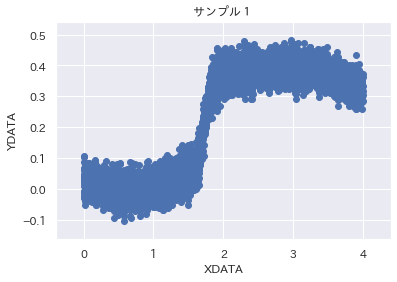

In [182]:
# 散布図の範囲情報の抽出
minx = np.min(x)
maxx = np.max(x)
rx = maxx-minx
cx = 0.5*rx
miny = np.min(y)
maxy = np.max(y)
ry = maxy-miny
cy = 0.5*ry

# 散布図の表示
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title("サンプル１")
ax.set_xlabel(dataset.columns[0])
ax.set_ylabel(dataset.columns[1])
ax.set_xlim([minx-0.1*rx,maxx+0.1*rx])
ax.set_ylim([miny-0.1*ry,maxy+0.1*ry])
ax.grid(True)
plt.show()

## 線形単回帰の実行

In [183]:
from sklearn import linear_model

# 線形回帰のインスタンス生成
reg = linear_model.LinearRegression()

# 回帰分析
reg.fit(x,y)

LinearRegression()

β0 = -0.04 
β1 =  0.13 


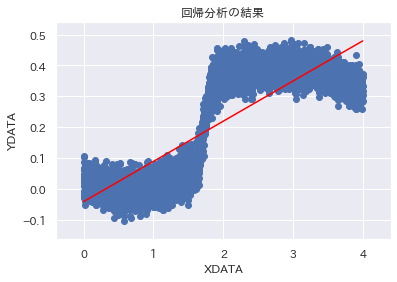

In [184]:
# 推定結果
beta0 = reg.intercept_[0]
beta1 = reg.coef_[0][0]
print("β0 = {0:5.2f} ".format(beta0))
print("β1 = {0:5.2f} ".format(beta1))

# 回帰直線をプロット
fig, ax = plt.subplots()
xfit = np.linspace(minx,maxx,nSamples).reshape(-1,1)
yfit = reg.predict(xfit)
ax.scatter(x,y)
ax.plot(xfit,yfit, color = 'red')
ax.set_title("回帰分析の結果")
ax.set_xlabel(dataset.columns[0])
ax.set_ylabel(dataset.columns[1])
ax.set_xlim([minx-0.1*rx,maxx+0.1*rx])
ax.set_ylim([miny-0.1*ry,maxy+0.1*ry])
ax.grid(True)
plt.show()